# Attention Concise

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

## Fit the function

$$
y = 2 \sin(3x) + x^{2} + 0.2
$$

In [2]:
def f(x):
    """
    The function that we want to approximate through

    $$
    y = 2 \sin(3x) + x^{2} + 0.2
    $$

    Parameters
    ----------
    x : torch.Tensor
        The input tensor
    """
    return 2 * torch.sin(3 * x) + x**2 + 0.2


## Generating the Dataset

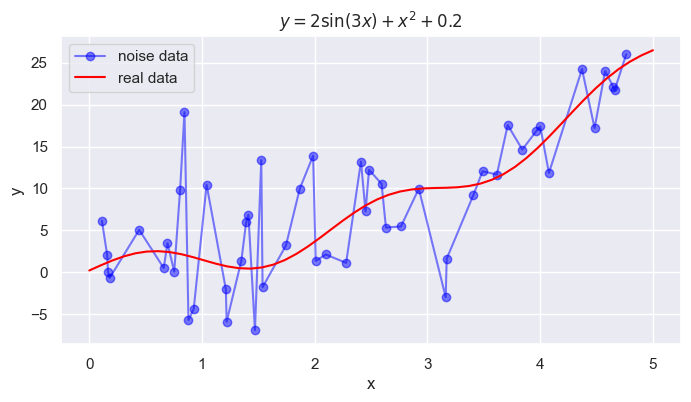

In [3]:
# 设置随机种子，以便结果可重现
torch.manual_seed(0)

n_train = 50  # 训练样本数
x_test = torch.linspace(0, 5, n_train)
y_test = f(x_test)
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本
y_train = f(x_train) + torch.normal(0.0, 5, (n_train,))  # 训练样本的输出

In [ ]:
sns.set()
# 创建图表
plt.figure(figsize=(8, 4))  # 设置图表大小

# 绘制折线图
plt.plot(x_train, y_train, label='noise data', color='blue', linestyle='-', marker='o', alpha=0.5)
plt.plot(x_test, y_test, label='real data', color='red')

# 添加标题和标签
plt.title(r'$y = 2 \sin(3x) + x^{2} + 0.2$')
plt.xlabel('x')
plt.ylabel('y')

# 添加图例
plt.legend()
plt.show()

## Nadaraya–Watson Regression

> Attention

$$
\hat{y} = f(x) = \mathbf{y}_\mathrm{train}^\top \mathrm{softmax}\left(-\frac{1}{2}(x - \mathbf{x}_\mathrm{train})^2\right).
$$

或者写成下面这样

$$
f(\mathbf{q}) = \mathbf{v}^\top \mathrm{softmax}\left(-\frac{1}{2}(\mathbf{q}^\top - \mathbf{k})^2\right).
$$

where $\mathbf{q} \in \mathbb{R}^{d \times 1}$ 
 are the queries, $\mathbf{k} \in \mathbb{R}^{n \times 1}$ are keys, $\mathbf{v} \in \mathbb{R}^{n \times 1}$ are values.


In [4]:
import torch.nn.functional as F

def Attention(x, x_train):
    """
    get attention weights
    
    Parameters
    ----------
    x : torch.Tensor
        query points
    x_train : torch.Tensor
        key points
    """
    return F.softmax( - (x_train.reshape((-1, 1)) - x.reshape((1, -1)))**2 / 2, dim=0)

# 重点理解qkv的地方
def NadarayaWatson(x, x_train, y_train):
    """
    Nadaraya-Watson kernel regression
    
    Parameters
    ----------
    x : torch.Tensor
        query points
    x_train : torch.Tensor
        key points
    y_train : torch.Tensor
        value points (also key points' values)
    """
    return (y_train @ Attention(x, x_train)).reshape(-1)

In [5]:
y_hat = NadarayaWatson(x_test, x_train, y_train)

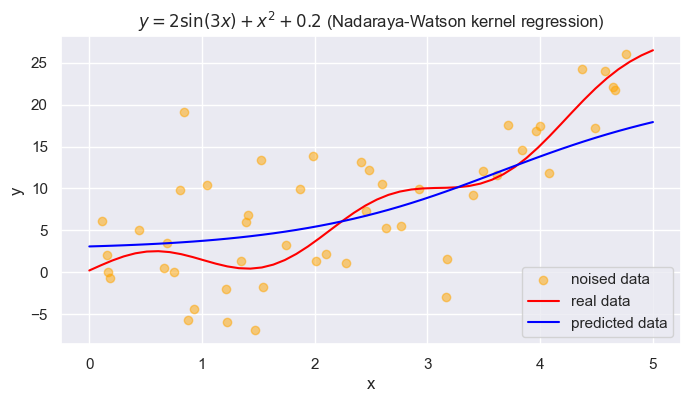

In [6]:
sns.set()
# 创建图表
plt.figure(figsize=(8, 4))  # 设置图表大小

# 绘制折线图
plt.scatter(x_train, y_train, label='noised data', color='orange', marker='o', alpha=0.5)
plt.plot(x_test, y_test, label='real data', color='red')
plt.plot(x_test, y_hat, label='predicted data', color='blue')

# 添加标题和标签
plt.title(r'$y = 2 \sin(3x) + x^{2} + 0.2$ (Nadaraya-Watson kernel regression)')
plt.xlabel('x')
plt.ylabel('y')

# 添加图例
plt.legend()
plt.show()

C:\Users\dongl\AppData\Local\Temp\ipykernel_9132\1140633411.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(pcm, shrink=0.7)


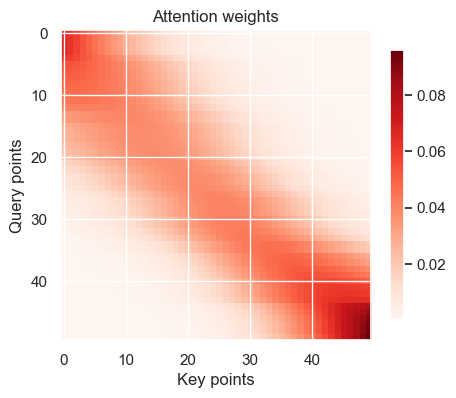

In [12]:
attention = Attention(x_test, x_train)

fig = plt.figure(figsize=(5, 5))

pcm = plt.imshow(
    attention.detach().numpy(), 
    cmap='Reds'
)

plt.xlabel('Key points')
plt.ylabel('Query points')
plt.title('Attention weights')
fig.colorbar(pcm, shrink=0.7)
plt.show()